In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/day%201/MVID_101001_171001.txt'
mvid = pd.read_csv(url)

In [35]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/day%201/SBER_101001_171001.txt'
sber = pd.read_csv(url)

In [36]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [5]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [6]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

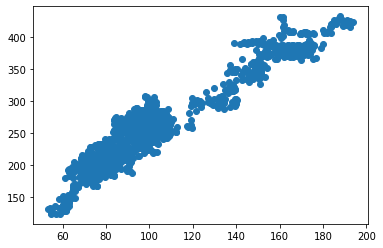

In [7]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [29]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [30]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


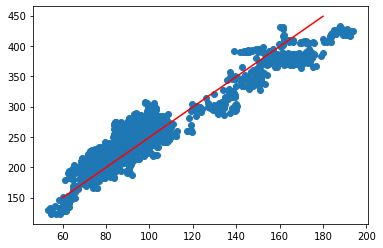

In [31]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

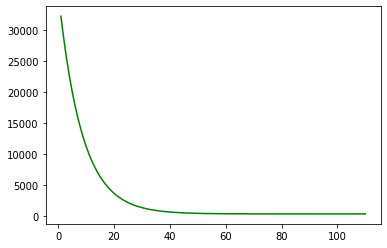

In [32]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X = pd.DataFrame(x)

In [19]:
reg = LinearRegression().fit(X, y)

In [20]:
reg.score(X, y)

0.9111046169982557

In [23]:
reg.coef_

array([1.99635191])

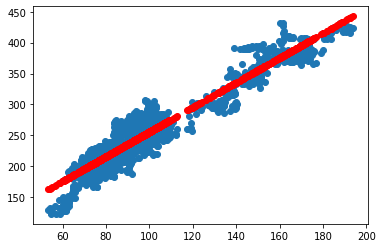

In [28]:
X0 = pd.DataFrame(x)
Y0 = reg.predict(X0)
 
plt.figure()
plt.scatter(x, y)
plt.scatter(X0, Y0, c='r')
plt.show()